# Install requirements

In [1]:
! pip install -r requirements.txt

# Imports 

In [2]:

from MCTS import MCT
from env import Env
from modell import Net
from tqdm import tqdm
import matplotlib.pyplot as plt



In [3]:
net=Net(3*6,4)
k_scram=1.0


the greater `c_param` is the stronger the tree policy follows the network policy.

  0%|          | 0/600 [00:00<?, ?it/s]

100%|██████████| 600/600 [01:25<00:00,  7.05it/s]


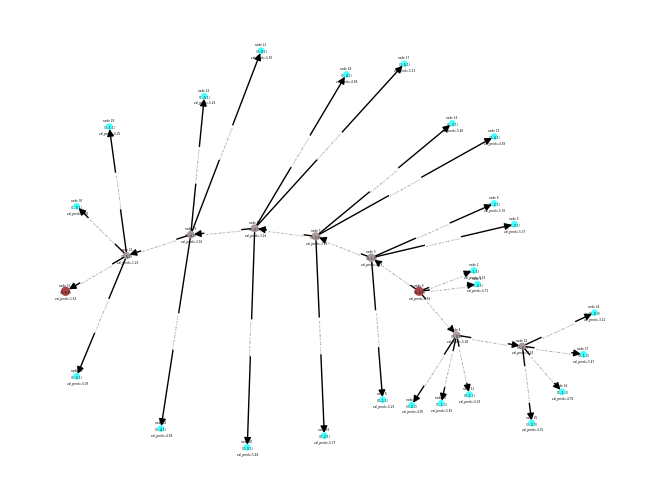

k_scram =7.599999999999833
{'x': tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]]), 'value_tgt': tensor([-1., -2., -3., -4., -5., -6.]), 'policy_tgt': tensor([[0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.]]), 'weight': tensor([1.0000, 0.5000, 0.3333, 0.2500, 0.2000, 0.1667])}


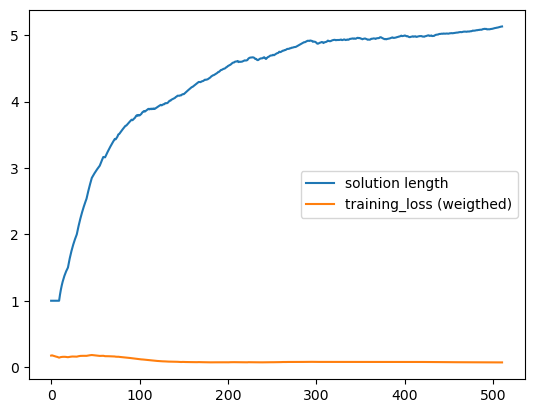

In [4]:
%config InlineBackend.figure_formats = ['png']
plt.rcParams["figure.dpi"]=100
max_tree_size=200

scram_inc=0.1 # increment if solved
scram_dec=0.5 # decrement if not solved

k_scram=min(k_scram,200)

#net.clear_History()

iterarations=600

net.train_buffer_size=800
for i in tqdm(range(iterarations)):
    k_scram=max(k_scram,1)
    tree=MCT(modell=net,Env=Env,c_param=1000,viLoss_param=0.0,k_scramble=int(k_scram))
    solved_state=None
    for u in range(max_tree_size):

        solved_state=tree.update()
        if solved_state is not None:
            train_data=solved_state.extract_train_data()
            net.fit(train_data,epochs=1,lr=0.0001)
            k_scram+=scram_inc

            break
    else:
        k_scram-=scram_dec

tree.display_tree()
print(f"{k_scram =}")
print(f"{str(train_data)}")

net.plot_History()

# Display tree

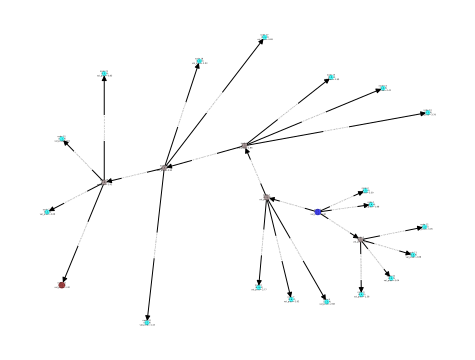

k_scram =8.29999999999983


In [12]:
%config InlineBackend.figure_formats = ['svg']

max_tree_size=100


k=5

tree=MCT(modell=net,Env=Env,c_param=1000,viLoss_param=0.0,k_scramble=k)
solved_state=None
for u in range(max_tree_size):

    solved_state=tree.update()
    if solved_state is not None:
        train_data=solved_state.extract_train_data()
        k_scram+=scram_inc

        break

tree.display_tree()

In [6]:
train_data

{'x': tensor([[1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
         [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.],
         [0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
         [0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]]),
 'value_tgt': tensor([-1., -2., -3., -4., -5.]),
 'policy_tgt': tensor([[0., 0., 0., 1.],
         [0., 0., 1., 0.],
         [0., 1., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.]]),
 'weight': tensor([1.0000, 0.5000, 0.3333, 0.2500, 0.2000])}